In [1219]:
import pandas as pd


In [1220]:
dataset=pd.read_csv("loan.csv")

In [1221]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1222]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1223]:
dataset['Gender']=dataset['Gender'].fillna(dataset['Gender'].mode()[0])

In [1224]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1225]:
dataset['Married']=dataset['Married'].fillna(dataset['Gender'].mode()[0])
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1226]:
#1) method -get dummies in pandas for performing one hot encoding

In [1227]:
en_data=dataset[['Gender','Married']]
en_data

,Gender,Married
0,Male,No
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,No
...,...,...
609,Female,No
610,Male,Yes
611,Male,Yes
612,Male,Yes


In [1228]:
pd.get_dummies(data=en_data)

,Gender_Female,Gender_Male,Married_Male,Married_No,Married_Yes
0,False,True,False,True,False
1,False,True,False,False,True
2,False,True,False,False,True
3,False,True,False,False,True
4,False,True,False,True,False
...,...,...,...,...,...
609,True,False,False,True,False
610,False,True,False,False,True
611,False,True,False,False,True
612,False,True,False,False,True


In [1229]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_Male   614 non-null    bool 
 3   Married_No     614 non-null    bool 
 4   Married_Yes    614 non-null    bool 
dtypes: bool(5)
memory usage: 3.1 KB


In [1230]:
from sklearn.preprocessing import OneHotEncoder

In [1231]:
ohe=OneHotEncoder()
ohe.fit_transform(en_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1228 stored elements and shape (614, 5)>

In [1232]:
ohe=OneHotEncoder()
ohe.fit_transform(en_data).toarray()

array([[0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]], shape=(614, 5))

In [1233]:
ohe=OneHotEncoder(drop='first')
ar=ohe.fit_transform(en_data).toarray()
ar

array([[1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       ...,
       [1., 0., 1.],
       [1., 0., 1.],
       [0., 1., 0.]], shape=(614, 3))

In [1234]:
pd.DataFrame(ar,columns=['Gender_Male','Married_No','Married_Yes'])

,Gender_Male,Married_No,Married_Yes
0,1.0,1.0,0.0
1,1.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,1.0,1.0,0.0
...,...,...,...
609,0.0,1.0,0.0
610,1.0,0.0,1.0
611,1.0,0.0,1.0
612,1.0,0.0,1.0


In [1235]:
#Label Encoding

In [1236]:
import pandas as pd

In [1237]:
df=pd.DataFrame({"name":["wscube","cow","cat","dog","back"]})
df

,name
0,wscube
1,cow
2,cat
3,dog
4,back


In [1238]:
from sklearn.preprocessing import LabelEncoder

In [1239]:
le =LabelEncoder()
df['en_name']=le.fit_transform(df['name'])

In [1240]:
df

,name,en_name
0,wscube,4
1,cow,2
2,cat,1
3,dog,3
4,back,0


In [1241]:
dataset=pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1242]:
dataset['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [1243]:
la=LabelEncoder()
la.fit(dataset['Property_Area'])

LabelEncoder()

In [1244]:
dataset['Property_Area']=la.transform(dataset['Property_Area'])

In [1245]:
#Ordinal Encoding

In [1246]:
#ordinal encoding can be perform in two ways 1) using scikit learn 2) using map

In [1247]:
import pandas as pd

In [1248]:
df=pd.DataFrame({"Size":['s','m','l','xl','s','m','l','s','s','l','xl','m']})
df.head(3)

,Size
0,s
1,m
2,l


In [1249]:
ord_data=[['s','m','l','xl']]

In [1250]:
from sklearn.preprocessing import OrdinalEncoder

In [1251]:
oe=OrdinalEncoder(categories=ord_data)
oe.fit(df[['Size']])

OrdinalEncoder(categories=[['s', 'm', 'l', 'xl']])

In [1252]:
df['Size_en']=oe.transform(df[['Size']])

In [1253]:
df

,Size,Size_en
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,s,0.0
5,m,1.0
6,l,2.0
7,s,0.0
8,s,0.0
9,l,2.0


In [1254]:
#using map function

In [1255]:
ord_data1={'s':0,'m':1,'l':2,'xl':3}

In [1256]:
df['Size_en_map']=df['Size'].map(ord_data1)

In [1257]:
df

,Size,Size_en,Size_en_map
0,s,0.0,0
1,m,1.0,1
2,l,2.0,2
3,xl,3.0,3
4,s,0.0,0
5,m,1.0,1
6,l,2.0,2
7,s,0.0,0
8,s,0.0,0
9,l,2.0,2


In [1258]:
dataset=pd.read_csv('loan.csv')
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1259]:
dataset['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [1260]:
#to remove nan in property area if present

In [1261]:
dataset['Property_Area']=dataset['Property_Area'].fillna(dataset['Property_Area'].mode()[0])

In [1262]:
en_data_ord=[['Rural','Semiurban','Urban']]

In [1263]:
from sklearn.preprocessing import OrdinalEncoder

In [1264]:
oen=OrdinalEncoder(categories=en_data_ord)

In [1265]:
dataset['Property_Area']=oen.fit_transform(dataset[['Property_Area']])

In [1266]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2.0,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,2.0,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,2.0,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,1.0,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,2.0,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,1.0,N


In [1267]:
#OUTLIER

In [1268]:
import pandas as pd

In [1269]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1270]:
dataset=pd.read_csv("loan.csv")

In [1271]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1272]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1273]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


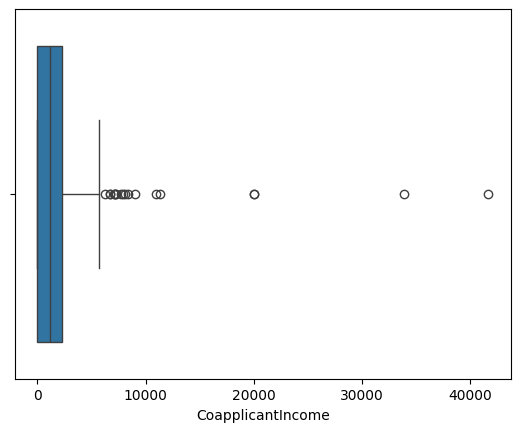

In [1274]:
sns.boxplot(x='CoapplicantIncome',data=dataset)
plt.show()

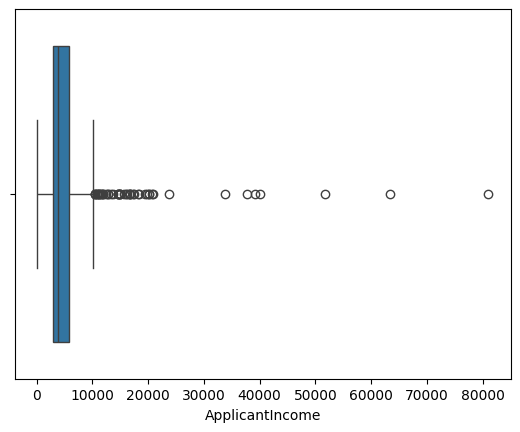

In [1275]:
sns.boxplot(x='ApplicantIncome',data=dataset)  #detecting outlier
plt.show()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\1097725172.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])  #detecting outlier


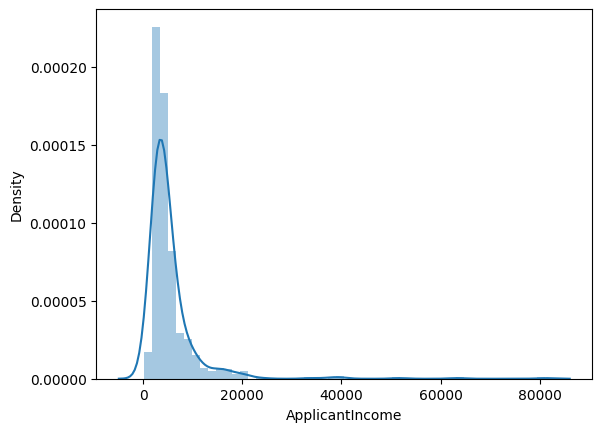

In [1276]:
sns.distplot(dataset['ApplicantIncome'])  #detecting outlier
plt.show()

In [1277]:
l=[5,6,7,5,4,6,7,5]
sum(l)/len(l)

5.625

In [1278]:
l=[5,6,7,5,4,6,7,5,100]  #here 100 is outlier becuz sab number ass pass he but 100 kafi dur he inse isliye wo outlier hoga, bol sakte he ki 100 range he bahar he
sum(l)/len(l)

16.11111111111111

In [1279]:
#above all these are outlier detection 

In [1280]:
#below is outlier handling  using iqr (interquantile range)  iqr=q3-q1 
#range(q1-1.5*iqr,q3+1.5*iqr)


In [1281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1282]:
dataset=pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1283]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1284]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


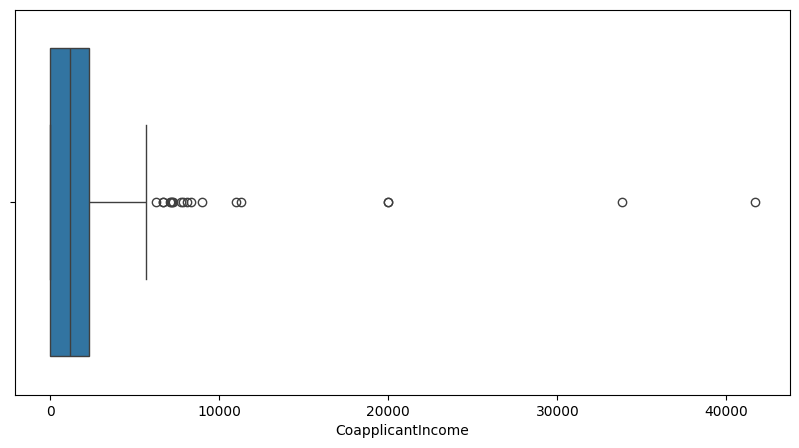

In [1285]:
plt.figure(figsize=(10,5))
sns.boxplot(x="CoapplicantIncome",data=dataset)
plt.show()

In [1286]:
dataset.shape

(614, 13)

In [1287]:
q1=dataset['CoapplicantIncome'].quantile(0.25)
q3=dataset['CoapplicantIncome'].quantile(0.75)

In [1288]:
IQR=q3-q1

In [1289]:
IQR

np.float64(2297.25)

In [1290]:
min_range=q1-1.5*IQR

In [1291]:
max_range=q3+1.5*IQR

In [1292]:
(min_range,max_range)

(np.float64(-3445.875), np.float64(5743.125))

In [1293]:
new_dataset=dataset[dataset['CoapplicantIncome']<=max_range]

In [1294]:
new_dataset.shape

(596, 13)

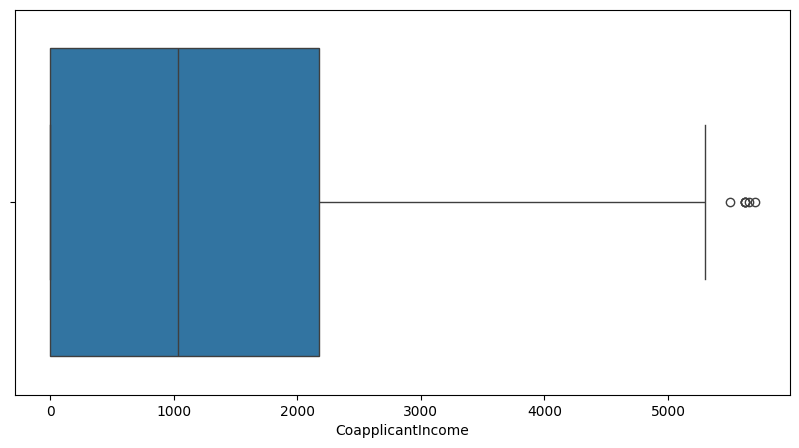

In [1295]:
plt.figure(figsize=(10,5))
sns.boxplot(x="CoapplicantIncome",data=new_dataset)
plt.show()

In [1296]:
#OUTLIER REMOVAL USING Z-SCORE

In [1297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1298]:
dataset=pd.read_csv("loan.csv")

In [1299]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1300]:
dataset.shape

(614, 13)

In [1301]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1302]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


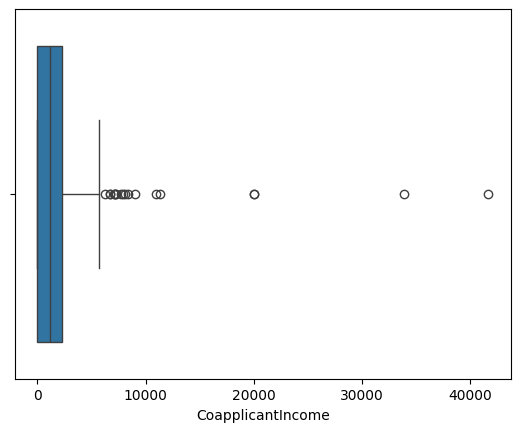

In [1303]:
sns.boxplot(x='CoapplicantIncome',data=dataset)
plt.show()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


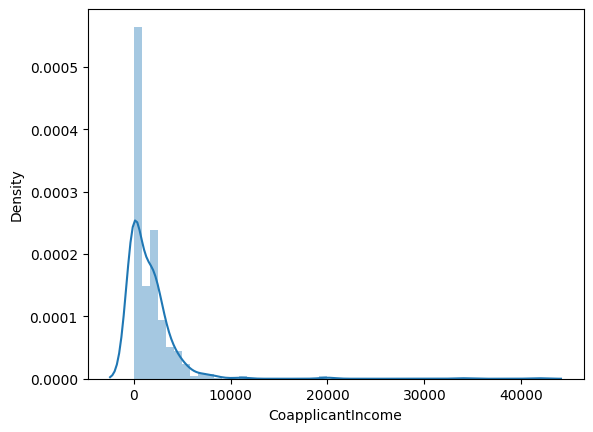

In [1304]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [1305]:
#1)method (direct)

In [1306]:
min_range=dataset['CoapplicantIncome'].mean()-(3*dataset['CoapplicantIncome'].std())
max_range=dataset['CoapplicantIncome'].mean()+(3*dataset['CoapplicantIncome'].std())
min_range,max_range

(np.float64(-7157.4993096454655), np.float64(10399.990905699668))

In [1307]:
new_data=dataset[dataset['CoapplicantIncome']<=max_range]

In [1308]:
new_data.shape

(608, 13)

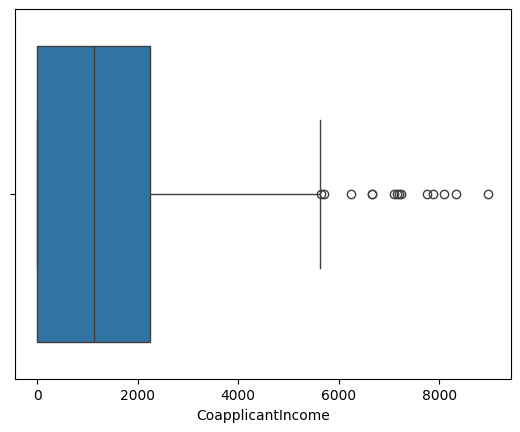

In [1309]:
sns.boxplot(x='CoapplicantIncome',data=new_data)
plt.show()

In [1310]:
#2nd method using z-score

In [1311]:
z_score=(dataset['CoapplicantIncome']-dataset['CoapplicantIncome'].mean())/(dataset['CoapplicantIncome'].std())

In [1312]:
z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [1313]:
z_score>3

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: CoapplicantIncome, Length: 614, dtype: bool

In [1314]:
dataset["z_score"]=z_score

In [1315]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036


In [1316]:
dataset[dataset["z_score"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [1317]:
#feature scaling -- two types-- 1)  standardization  , 2)normaliazation

In [1318]:
# 1) normalization -- min-max scaling

In [1319]:
#standardization formula --->   Xnew=(Xi-Xmean)/Std   (here in mean=0, variance=1)

In [1320]:
import pandas as pd

In [1321]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1322]:
dataset=pd.read_csv("loan.csv")


In [1323]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1324]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1325]:
dataset['ApplicantIncome']=dataset['ApplicantIncome'].fillna(dataset['ApplicantIncome'].mean())

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\1976060950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])


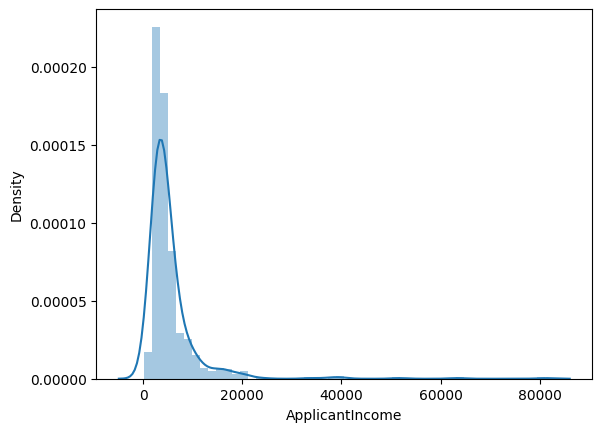

In [1326]:
sns.distplot(dataset['ApplicantIncome'])
plt.show()

In [1327]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [1328]:
from sklearn.preprocessing import StandardScaler

In [1329]:
ss=StandardScaler()

In [1330]:
ss.fit(dataset[['ApplicantIncome']])

StandardScaler()

In [1331]:
ss.transform(dataset[['ApplicantIncome']])

array([[ 7.29908229e-02],
       [-1.34411954e-01],
       [-3.93747337e-01],
       [-4.62062470e-01],
       [ 9.77284368e-02],
       [ 2.21831139e-03],
       [-5.03018784e-01],
       [-3.87849628e-01],
       [-2.28939128e-01],
       [ 1.21845703e+00],
       [-3.60982286e-01],
       [-4.75659966e-01],
       [-3.81788093e-01],
       [-5.81654908e-01],
       [-6.72414101e-01],
       [-7.42880841e-02],
       [-2.96107483e-01],
       [-3.10196456e-01],
       [-8.46090753e-02],
       [-4.59277440e-01],
       [ 3.69678365e-01],
       [ 9.03563002e-02],
       [-4.59277440e-01],
       [-3.33951118e-01],
       [-2.76284627e-01],
       [ 6.80946355e-01],
       [-4.26676214e-01],
       [-1.92897571e-01],
       [-6.48987089e-01],
       [-2.70878394e-01],
       [-2.02727086e-01],
       [-3.66388519e-01],
       [-1.16555001e-01],
       [-3.11834708e-01],
       [ 1.16259261e+00],
       [-5.12520649e-01],
       [-5.85750540e-01],
       [-2.84475890e-01],
       [-2.0

In [1332]:
dataset['ApplicantIncome_ss']=pd.DataFrame(ss.transform(dataset[['ApplicantIncome']]),columns=['x'])

In [1333]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


In [1334]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\4130558824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome_ss'])
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\4130558824.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])


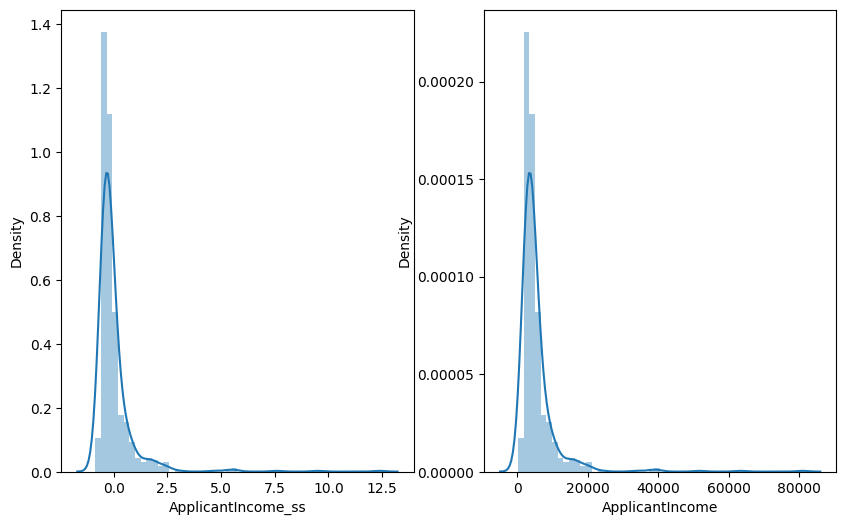

In [1335]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(dataset['ApplicantIncome_ss'])
plt.subplot(1,2,2)
sns.distplot(dataset['ApplicantIncome'])
plt.show()

In [1336]:
#feature scaling -normalizations(min-max scaling)  -range 0 to 1

In [1337]:
# normalization fomula --> Xnew = (Xi-min(X))/(max(x)-min(X))

In [1338]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [1339]:
dataset=pd.read_csv("loan.csv")

In [1340]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1341]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [1342]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1343]:
dataset.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


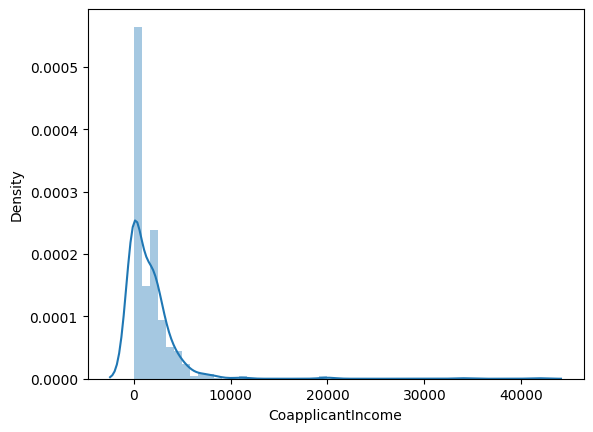

In [1344]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [1345]:
from sklearn.preprocessing import MinMaxScaler

In [1346]:
ms=MinMaxScaler()

In [1347]:
ms.fit(dataset[['CoapplicantIncome']])

MinMaxScaler()

In [1348]:
ms.transform(dataset[['CoapplicantIncome']])

array([[0.00000000e+00],
       [3.61917105e-02],
       [0.00000000e+00],
       [5.65915473e-02],
       [0.00000000e+00],
       [1.00703194e-01],
       [3.63837089e-02],
       [6.00955192e-02],
       [3.66237070e-02],
       [2.63229894e-01],
       [1.67998656e-02],
       [4.41596467e-02],
       [1.94542444e-01],
       [6.81594547e-02],
       [2.60637915e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [8.39993280e-02],
       [0.00000000e+00],
       [1.34998920e-01],
       [4.58636331e-02],
       [4.60076319e-02],
       [7.01994384e-02],
       [0.00000000e+00],
       [5.40715674e-02],
       [2.49598003e-02],
       [0.00000000e+00],
       [4.99916001e-02],
       [8.08553532e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.00076799e-02],
       [7.19994240e-02],
       [4.96076031e-02],
       [3.19197446e-02],
       [3.50157199e-02],
       [1.73038616e-01],
       [4.00316797e-02],


In [1349]:
dataset['CoapplicantIncome_min']= ms.transform(dataset[['CoapplicantIncome']])

In [1350]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_min
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\1410704847.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\1410704847.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome_min'])


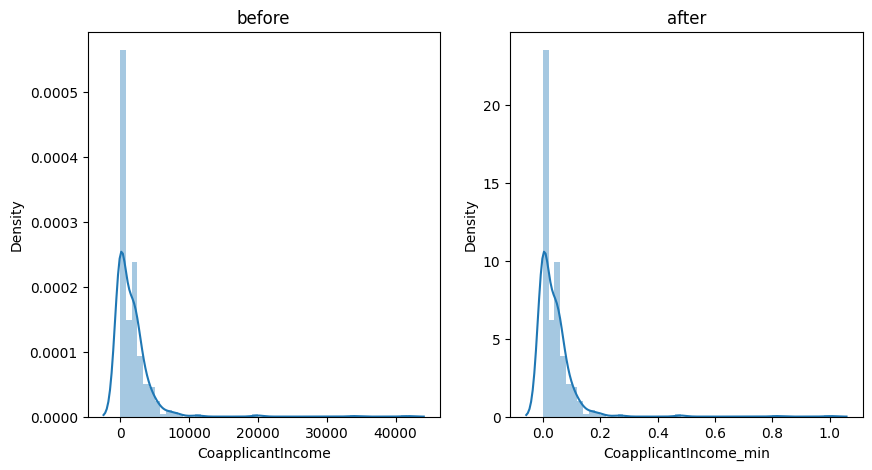

In [1351]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("before")
sns.distplot(dataset['CoapplicantIncome'])
plt.subplot(1,2,2)
plt.title("after")
sns.distplot(dataset['CoapplicantIncome_min'])
plt.show()

In [1352]:
#handle duplicate data

In [1353]:
import pandas as pd


In [1354]:
data={"name":['a','b','c','d','a','c'],"eng":[8,7,5,8,8,5],"hindi":[2,3,4,5,2,6]}

In [1355]:
df=pd.DataFrame(data)

In [1356]:
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,5,6


In [1357]:
df.duplicated()

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [1358]:
# df['duplicated']=df.duplicated()

In [1359]:
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,5,6


In [1360]:
df.drop_duplicates()

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
5,c,5,6


In [1361]:
df.drop_duplicates(keep='first')

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
5,c,5,6


In [1362]:
df.drop_duplicates(inplace=True)

In [1363]:
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
5,c,5,6


In [1364]:
dataset=pd.read_csv("loan.csv")

In [1365]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1366]:
# dataset.duplicated()

In [1367]:
dataset.shape

(614, 13)

In [1368]:
dataset.drop_duplicates(inplace=True)

In [1369]:
dataset.shape

(614, 13)

In [1370]:
#Data Replace

In [1371]:
import pandas as pd

In [1372]:
dataset=pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1373]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1374]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1375]:
dataset['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [1376]:
dataset['Dependents']=dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])

In [1377]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1378]:
dataset['Dependents']=dataset['Dependents'].replace("3+","3")

In [1379]:
dataset['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [1380]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1381]:
dataset['Dependents']=dataset['Dependents'].astype("int64")

In [1382]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [1383]:
#Function Transformer

In [1384]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1385]:
dataset=pd.read_csv("loan.csv")

In [1386]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1387]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


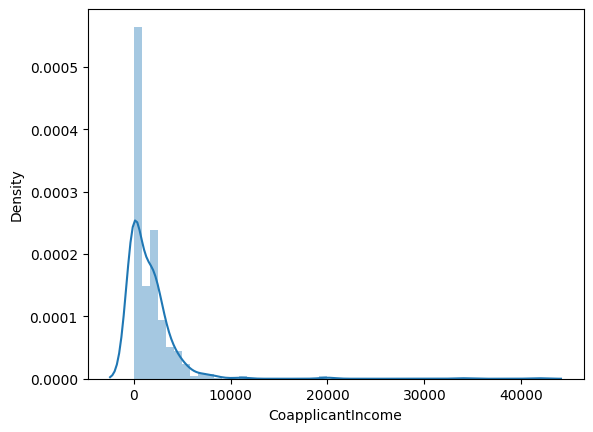

In [1388]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [1389]:
#removing outlier

In [1390]:
q1=dataset['CoapplicantIncome'].quantile(0.25)
q3=dataset['CoapplicantIncome'].quantile(0.75)

In [1391]:
iqr=q3-q1

In [1392]:
min_r=q1-1.5*iqr
max_r=q3+1.5*iqr

In [1393]:
min_r,max_r

(np.float64(-3445.875), np.float64(5743.125))

In [1394]:
dataset=dataset[dataset['CoapplicantIncome']<=max_r]

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\4190355524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


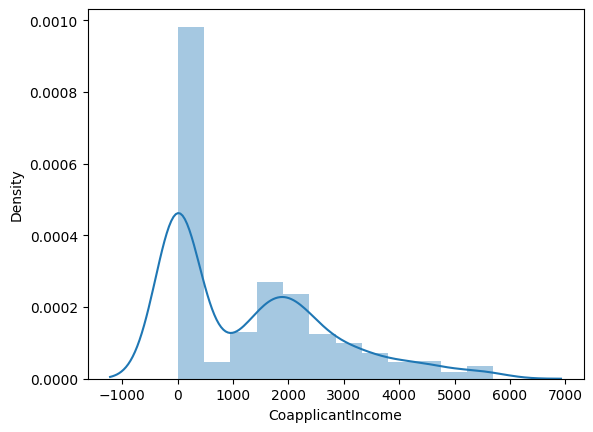

In [1395]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show() #removed outlier

In [1396]:
from sklearn.preprocessing import FunctionTransformer

In [1397]:
ft=FunctionTransformer(func=np.log1p) 


In [1398]:
ft.fit(dataset[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [1399]:
dataset['CoapplicantIncome_tf']=ft.transform(dataset[['CoapplicantIncome']])

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\3979423846.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\3979423846.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome_tf'])


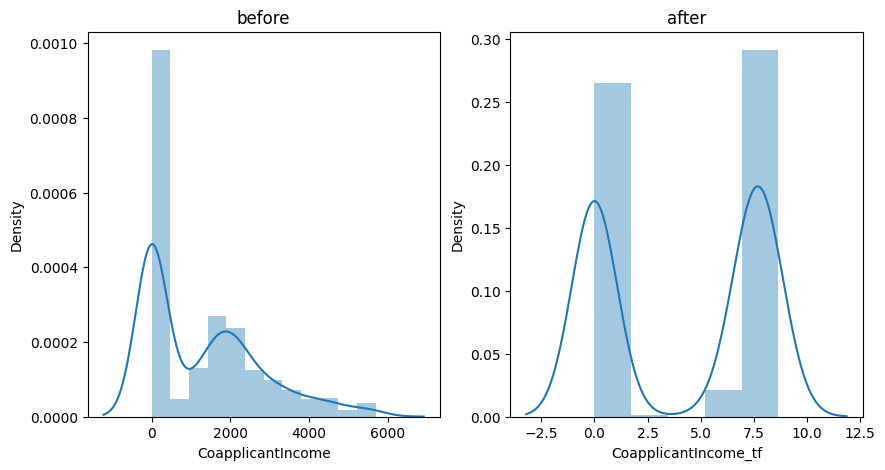

In [1400]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("before")
sns.distplot(dataset['CoapplicantIncome'])
plt.subplot(1,2,2)
plt.title("after")
sns.distplot(dataset['CoapplicantIncome_tf'])
plt.show()

In [1401]:
ft1=FunctionTransformer(func=lambda x:x**2)
ft1.fit(dataset[['CoapplicantIncome']])
dataset['CoapplicantIncome_tf1']=ft.transform(dataset[['CoapplicantIncome']])

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\3793049655.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome_tf1'])
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22076\3793049655.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome_tf1'])


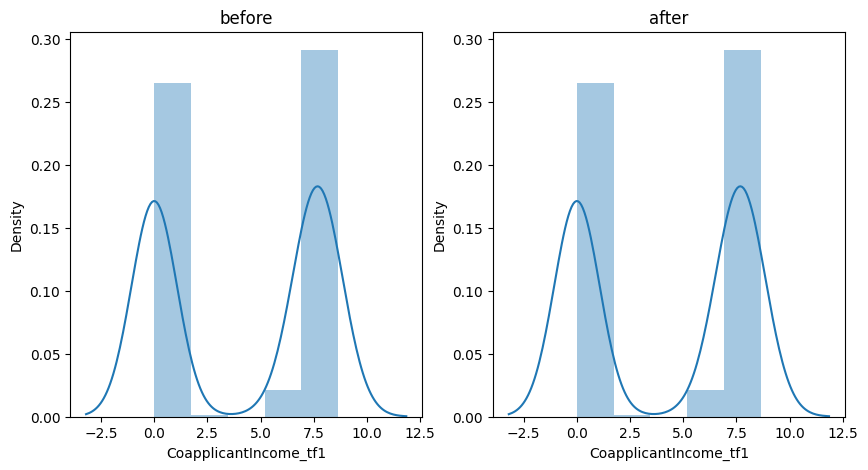

In [1402]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("before")
sns.distplot(dataset['CoapplicantIncome_tf1'])
plt.subplot(1,2,2)
plt.title("after")
sns.distplot(dataset['CoapplicantIncome_tf1'])
plt.show()

In [1611]:
#feature selection technique--> 1) forward elimination 2) backward elimination

In [1630]:
import pandas as pd
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector

In [1636]:
dataset=pd.read_csv("diabetes.csv")

In [1638]:
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [1640]:
x=dataset.iloc[:,:-1]  #row ,col

In [1650]:
x.shape

(768, 8)

In [1642]:
y=dataset['Outcome']

In [1644]:
from sklearn.linear_model import LogisticRegression

In [1646]:
lr=LogisticRegression()

In [1652]:
fs=SequentialFeatureSelector(lr,k_features=8,forward=True)  # for backward put forward=False
fs.fit(x,y)

C:\Users\VICTUS\.codegeex\mamba\envs\codegeex-agent\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VICTUS\.codegeex\mamba\envs\codegeex-agent\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(8, 8),
                          scoring='accuracy')

In [1656]:
fs.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [1658]:
fs.k_feature_names_

('Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age')

In [1660]:
fs.k_score_

np.float64(0.7682624564977505)